Loading images from:
Image 1 path: C:\Users\jk\Desktop\image 1.jpg
Image 2 path: C:\Users\jk\Desktop\image2.jpeg


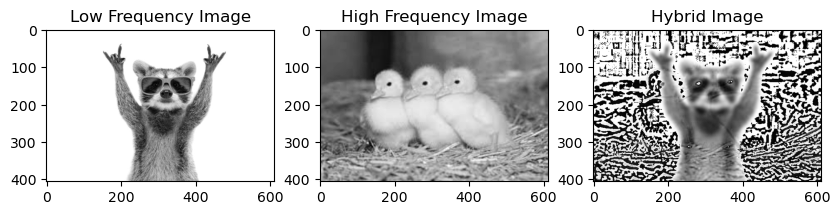

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define paths for the images
image1_path = r"C:\Users\jk\Desktop\image 1.jpg"
image2_path = r"C:\Users\jk\Desktop\image2.jpeg"

# Print paths to confirm
print("Loading images from:")
print("Image 1 path:", image1_path)
print("Image 2 path:", image2_path)

# Load the images
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)  # Low-frequency image
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)  # High-frequency image

# Check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error: One or both images could not be loaded. Check file paths.")
else:
    # Resize the images to be the same size
    height, width = image1.shape
    image2_resized = cv2.resize(image2, (width, height))

    # Continue processing if images are loaded and resized correctly
    low_frequencies = cv2.GaussianBlur(image1, (15, 15), 5)
    high_frequencies = image2_resized - cv2.GaussianBlur(image2_resized, (15, 15), 5)
    hybrid_image = np.clip(low_frequencies + high_frequencies, 0, 255)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image1, cmap='gray')
    plt.title('Low Frequency Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(image2_resized, cmap='gray')
    plt.title('High Frequency Image')
    
    plt.subplot(1, 3, 3)
    plt.imshow(hybrid_image, cmap='gray')
    plt.title('Hybrid Image')
    
    plt.show()
